# About Dataset

This dataset pulls the projects posted by clients on PeoplePerHour.
Data collection started on January 20th, 2023, and adds approximately ~40 new projects to this dataset every hour.

Inspiration:

I have been a freelance Python Developer since my graduation (2019). And recently I completed the Google Data Analytics Professional Certificate from Coursera.

Last week I saw this cool video from LUKE BAROUSSE on youtube here's the link. He created a pipeline to scrape Data Analyst jobs in the US on a daily basis and update the dataset daily on Kaggle. Also lately I was not winning a lot of jobs as a freelancer. I have also started looking for a job in Data Analytics. So I thought a lot about it and concluded to do some analysis as it would be a great project to add to my resume.

I hope this dataset proves to be useful to you.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import ydata_profiling as yp
sns.set(style= 'darkgrid')
%matplotlib inline
from datetime import datetime
from wordcloud import WordCloud
import missingno as msno

In [2]:
df = pd.read_csv('Freelance_Projects.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

In [4]:
df.describe()

Budget
count  12222.000000
mean     229.221486
std     1894.327521
min        0.000000
25%       30.000000
50%       80.000000
75%      150.000000
max    99999.000000

In [5]:
print('There are ' + str(df.shape[0]) + ' rows and' + str(df.shape[1]) + ' columns')

There are 12222 rows and17 columns


In [6]:
df.isna().sum()

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [7]:
msno.matrix(df)

<Axes: >

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

Title         Category Name    Experience  \
0  Banner images for web desgin websites                Design     Entry ($)   
1    Make my picture a solid silhouette   Video, Photo & Image     Entry ($)   
2                      Bookkeeper needed              Business     Entry ($)   
3                     Accountant needed               Business     Entry ($)   
4          Guest Post on High DA Website     Digital Marketing  Expert ($$$)   

           Sub Category Name Currency   Budget Location  \
0             Graphic Design      EUR     60.0   remote   
1              Image Editing      GBP     20.0   remote   
2       Finance & Accounting      GBP     12.0   remote   
3  Tax Consulting & Advising      GBP     14.0   remote   
4                        SEO      USD  10000.0   remote   

  Freelancer Preferred From         Type          Date Posted  \
0                       ALL  fixed_price  2023-04-29 18:06:39   
1                       ALL  fixed_price  2023-04-29 17:40:28   
2                       ALL  fixed_price  2023-04-29 17:40:06   
3                       ALL  fixed_price  2023-04-29 17:32:01   
4                       ALL  fixed_price  2023-04-29 17:09:36   

                                         Description Duration  \
0  We are looking to improve the banner images on...      NaN   
1  Hello \n\nI need a quick designer to make 4 pi...      NaN   
2  Hi - I need a bookkeeper to assist with bookke...      NaN   
3  Hi - I need an accountant to assist me with un...      NaN   
4  Hi, I am currently running a project where I w...      NaN   

  Client Registration Date Client City  Client Country Client Currency  \
0               2010-11-03      Dublin         Ireland             EUR   
1               2017-02-21      London  United Kingdom             GBP   
2               2023-04-09      London  United Kingdom             GBP   
3               2023-04-09      London  United Kingdom             GBP   
4               2016-07-01      Mumbai           India             USD   

    Client Job Title  
0     PPC Management  
1     Office manager  
2          Paralegal  
3          Paralegal  
4  Guest posts buyer

In [10]:
df.tail()

Title  \
12217  Published Travel Writer required for content c...   
12218  Shopify - Filtering Work (Product Selection/No...   
12219                                   Simple SQL Query   
12220  Create a Carbon, Water, Waste Calculating plat...   
12221                                  COMPANY REGISTERS   

                  Category Name         Experience          Sub Category Name  \
12217     Writing & Translation          Entry ($)            Content Writing   
12218                    Design  Intermediate ($$)                 Web Design   
12219  Technology & Programming          Entry ($)    Data Science & Analysis   
12220                    Design       Expert ($$$)                 Web Design   
12221                  Business       Expert ($$$)  Administration Assistance   

      Currency  Budget        Location Freelancer Preferred From         Type  \
12217      GBP    50.0          remote                       ALL  fixed_price   
12218      GBP    65.0  remote_country                        GB  fixed_price   
12219      GBP    50.0          remote                       ALL  fixed_price   
12220      USD    39.0          remote                       ALL       hourly   
12221      GBP    75.0          remote                       ALL  fixed_price   

               Date Posted                                        Description  \
12217  2023-01-18 19:23:01  I am looking for a published travel writer to ...   
12218  2023-01-18 19:18:48  On our website www.juicebitz.co.uk we have add...   
12219  2023-01-18 19:18:48  I need someone to write a quick SQL query on a...   
12220  2023-01-18 19:18:47  I am seeking a full stack web developer who sp...   
12221  2023-01-18 19:18:47  Hi, the following administrative task would be...   

            Duration Client Registration Date Client City  Client Country  \
12217            NaN               2011-06-06   Amsterdam     Netherlands   
12218  1 day or less               2022-03-23       Filey  United Kingdom   
12219            NaN               2022-03-14      London  United Kingdom   
12220            NaN               2013-07-21       Noida           India   
12221            NaN               2020-09-21       Grays  United Kingdom   

      Client Currency                                   Client Job Title  
12217             GBP                                   Wordpress Expert  
12218             GBP                                           Director  
12219             GBP                                                NaN  
12220             USD  Google Adwords, Pay Per Click, Google Shopping...  
12221             GBP                                                NaN

# Data Cleaning

Dropping unnecessary columns that arent going to be used for any analysis

In [11]:
df.drop(columns= ['Title','Description'],inplace=True)

In [12]:
#Check the unique values in the Experience Column

print('The unique Experience values are ' +  str(df['Experience'].unique()))

The unique Experience values are ['Entry ($)' 'Expert ($$$)' 'Intermediate ($$)']


In [13]:
def strip_dollar(Experience):
    
    if Experience == 'Entry ($)':
        
        return 'Entry'
        
    elif Experience == 'Expert ($$$)':
        
        return 'Expert'
    
    else:
        
        return 'Intermediate'

In [14]:
df['Experience'] = df['Experience'].apply(strip_dollar)

In [15]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])

In [16]:
#Stripping the date so that we remain with the year only

df['Date Posted'] = df['Date Posted'].dt.year


In [17]:
df.head()

Category Name Experience          Sub Category Name Currency  \
0                Design      Entry             Graphic Design      EUR   
1  Video, Photo & Image      Entry              Image Editing      GBP   
2              Business      Entry       Finance & Accounting      GBP   
3              Business      Entry  Tax Consulting & Advising      GBP   
4     Digital Marketing     Expert                        SEO      USD   

    Budget Location Freelancer Preferred From         Type  Date Posted  \
0     60.0   remote                       ALL  fixed_price         2023   
1     20.0   remote                       ALL  fixed_price         2023   
2     12.0   remote                       ALL  fixed_price         2023   
3     14.0   remote                       ALL  fixed_price         2023   
4  10000.0   remote                       ALL  fixed_price         2023   

  Duration Client Registration Date Client City  Client Country  \
0      NaN               2010-11-03      Dublin         Ireland   
1      NaN               2017-02-21      London  United Kingdom   
2      NaN               2023-04-09      London  United Kingdom   
3      NaN               2023-04-09      London  United Kingdom   
4      NaN               2016-07-01      Mumbai           India   

  Client Currency   Client Job Title  
0             EUR     PPC Management  
1             GBP     Office manager  
2             GBP          Paralegal  
3             GBP          Paralegal  
4             USD  Guest posts buyer

In [18]:
#Filling the missing duration with the modal value

df['Duration'].fillna(df['Duration'].mode().values[0], inplace=True)


In [19]:
df['Client Registration Date'] = pd.to_datetime(df['Client Registration Date'])

In [20]:
df['Client Registration Date'] = df['Client Registration Date'].dt.year

In [21]:
df['Client Job Title'] = df['Client Job Title'].fillna(df['Client Job Title'].values[0])

In [22]:
df.isna().sum()

Category Name                0
Experience                   0
Sub Category Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Duration                     0
Client Registration Date     0
Client City                  0
Client Country               0
Client Currency              0
Client Job Title             0
dtype: int64

In [23]:
df.rename(columns={'Date Posted': 'Year Posted'}, inplace=True)
df.rename(columns={'Client Registration Date': 'Client Registration Year'}, inplace=True)

In [24]:
df.head()

Category Name Experience          Sub Category Name Currency  \
0                Design      Entry             Graphic Design      EUR   
1  Video, Photo & Image      Entry              Image Editing      GBP   
2              Business      Entry       Finance & Accounting      GBP   
3              Business      Entry  Tax Consulting & Advising      GBP   
4     Digital Marketing     Expert                        SEO      USD   

    Budget Location Freelancer Preferred From         Type  Year Posted  \
0     60.0   remote                       ALL  fixed_price         2023   
1     20.0   remote                       ALL  fixed_price         2023   
2     12.0   remote                       ALL  fixed_price         2023   
3     14.0   remote                       ALL  fixed_price         2023   
4  10000.0   remote                       ALL  fixed_price         2023   

           Duration  Client Registration Year Client City  Client Country  \
0  less than 1 week                      2010      Dublin         Ireland   
1  less than 1 week                      2017      London  United Kingdom   
2  less than 1 week                      2023      London  United Kingdom   
3  less than 1 week                      2023      London  United Kingdom   
4  less than 1 week                      2016      Mumbai           India   

  Client Currency   Client Job Title  
0             EUR     PPC Management  
1             GBP     Office manager  
2             GBP          Paralegal  
3             GBP          Paralegal  
4             USD  Guest posts buyer

In [25]:
features = df.columns.to_list()

for feature in features:
    
    unique = df[feature].nunique()
    
    print(f'{feature} : {unique}')

Category Name : 9
Experience : 3
Sub Category Name : 107
Currency : 3
Budget : 524
Location : 3
Freelancer Preferred From : 42
Type : 2
Year Posted : 1
Duration : 29
Client Registration Year : 17
Client City : 1808
Client Country : 136
Client Currency : 3
Client Job Title : 1954


In [71]:
country = df['Client Country'].value_counts().reset_index()

In [73]:
country = country.rename(columns= {'index':'Client Country','Client Country': 'Counts'})

In [76]:
fig = px.choropleth(country, locations='Client Country', locationmode='country names', color='Counts', 
                    title='Countries where most clients come from', hover_name='Client Country', hover_data=['Counts'],
                    projection='natural earth')


fig.update_layout(geo=dict(showcoastlines=True))

fig.show()

In [27]:
features = ['Experience','Currency','Location','Client Currency','Type']

num_features = len(features)

num_cols = 3

num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize= (10,10))

for i, feature in enumerate(features):
           
    plt.subplot(num_rows, num_cols, i+1)
        
    plt.pie(df[feature].value_counts(), autopct= '%1.1f%%',labels= df[feature].unique())
    
    plt.title(f'Proportion of {feature}')
    
    
plt.tight_layout()

plt.show()

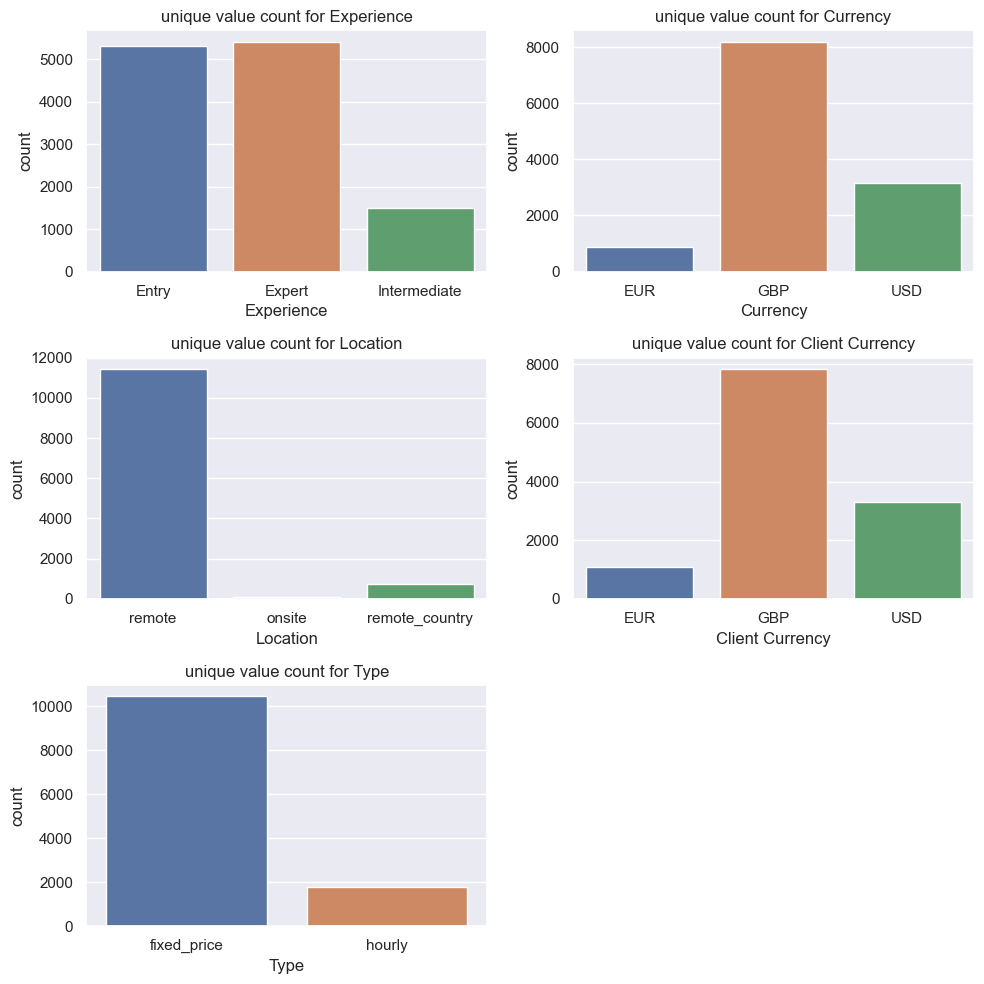

In [28]:
num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize= (10,10))

for i, feature in enumerate(features):
       
    plt.subplot(num_rows, num_cols, i+1)
        
    sns.countplot(data= df, x= feature)
    
    plt.title(f'unique value count for {feature}')
    
plt.tight_layout()

plt.show()

In [29]:
top_ten_city = df['Client City'].value_counts().reset_index()

top_ten_city= top_ten_city.rename(columns= {'index':'City','Client City': 'Counts'}).head(10)

top_ten_city

City  Counts
0          London    2539
1  City of London     352
2      Manchester     232
3      Birmingham     175
4   New York City     164
5           Leeds     119
6         Bristol      93
7           Dubai      86
8          Dublin      77
9    North Bergen      75

In [30]:
value_counts = df['Client Job Title'].value_counts()

counts_dict = value_counts.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(counts_dict)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.title('WordCloud for Client Job Title')

plt.show()


In [31]:
sns.barplot(data= top_ten_city, x= 'Counts', y= 'City')

plt.title('Barplot for the most frequent Client City')

Text(0.5, 1.0, 'Barplot for the most frequent Client City')

In [32]:
value_counts = df['Client Job Title'].value_counts()

counts_dict = value_counts.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(counts_dict)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.title('WordCloud for Client Job Title')

plt.show()


In [33]:
top_ten_jobs = df['Client Job Title'].value_counts().reset_index()

top_ten_jobs = top_ten_jobs.rename(columns= {'index':'Job Title','Client Job Title': 'Counts'}).head(10)

top_ten_jobs

Job Title  Counts
0     PPC Management    7637
1           Director     182
2                CEO     108
3  Managing Director      95
4              Owner      79
5                  .      65
6            Manager      45
7            Founder      38
8          Marketing      37
9  Creative Director      35

Text(0.5, 1.0, 'Barplot for the most Popular Client Job Title')

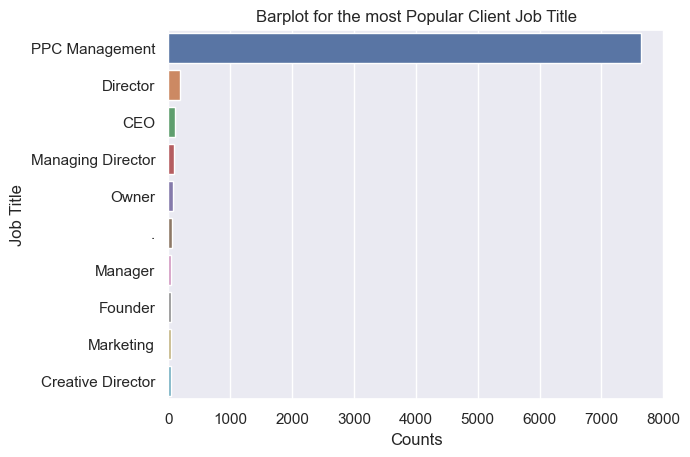

In [34]:
sns.barplot(data= top_ten_jobs, x= 'Counts', y= 'Job Title')

plt.title('Barplot for the most Popular Client Job Title')

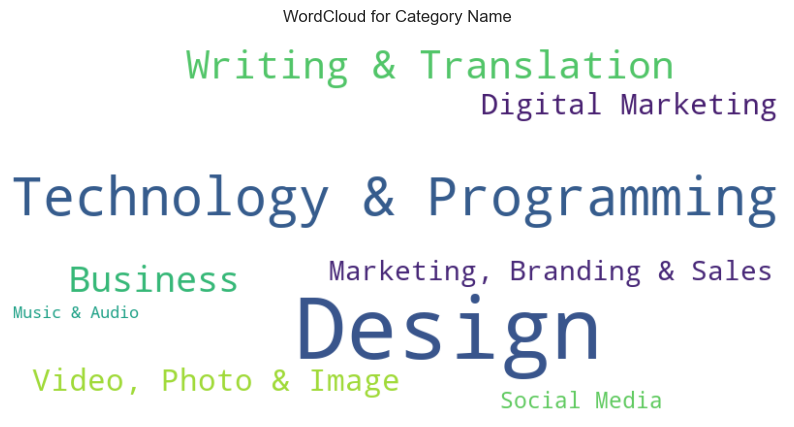

In [35]:
value_counts = df['Category Name'].value_counts()

counts_dict = value_counts.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(counts_dict)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation="bilinear")

plt.title('WordCloud for Category Name')

plt.axis("off")

plt.show()


In [36]:
top_ten_category = df['Category Name'].value_counts().reset_index()

top_ten_category = top_ten_category.rename(columns= {'index':'Category Name','Category Name': 'Counts'}).head(10)

top_ten_category

Category Name  Counts
0                       Design    3634
1     Technology & Programming    3003
2        Writing & Translation    1387
3                     Business    1211
4         Video, Photo & Image     847
5            Digital Marketing     792
6  Marketing, Branding & Sales     708
7                 Social Media     433
8                Music & Audio     207

Text(0.5, 1.0, 'Barplot for the most Popular Category Name')

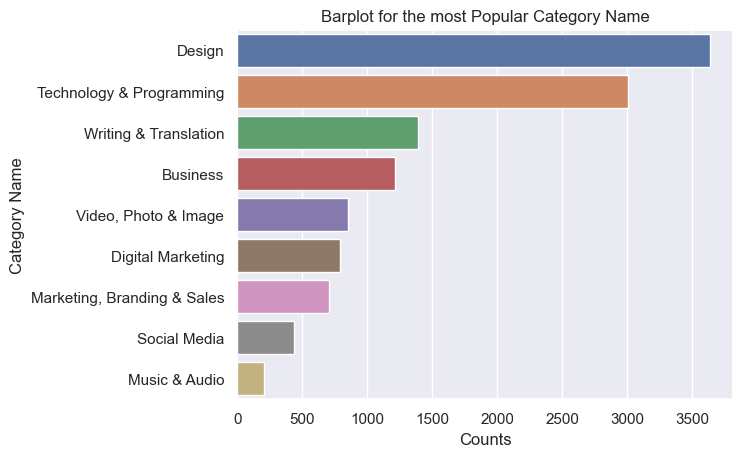

In [37]:
sns.barplot(data= top_ten_category, x= 'Counts', y= 'Category Name')

plt.title('Barplot for the most Popular Category Name')

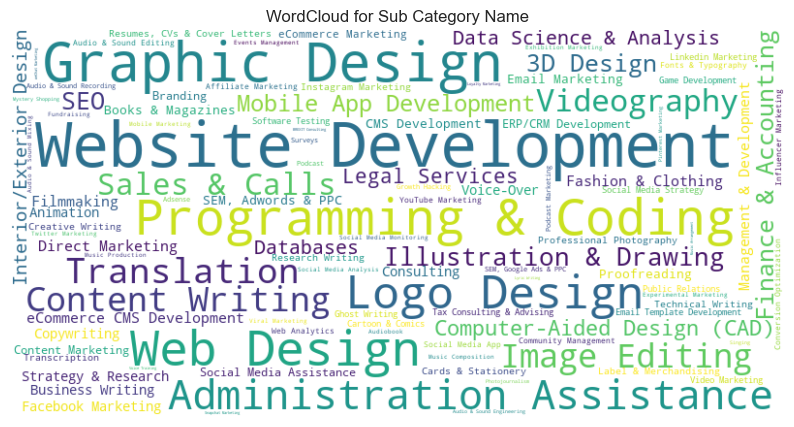

In [38]:
value_counts = df['Sub Category Name'].value_counts()

counts_dict = value_counts.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(counts_dict)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation="bilinear")

plt.title('WordCloud for Sub Category Name')

plt.axis("off")

plt.show()


In [39]:
top_ten_subs = df['Sub Category Name'].value_counts().reset_index()

top_ten_subs = top_ten_subs.rename(columns= {'index':'Sub Category Name','Sub Category Name': 'Counts'}).head(10)

top_ten_subs

Sub Category Name  Counts
0        Website Development    1220
1             Graphic Design     906
2       Programming & Coding     758
3                 Web Design     718
4                Logo Design     642
5  Administration Assistance     508
6                Translation     362
7            Content Writing     351
8              Image Editing     336
9                Videography     304

Text(0.5, 1.0, 'Barplot for the most Popular Sub Category Name')

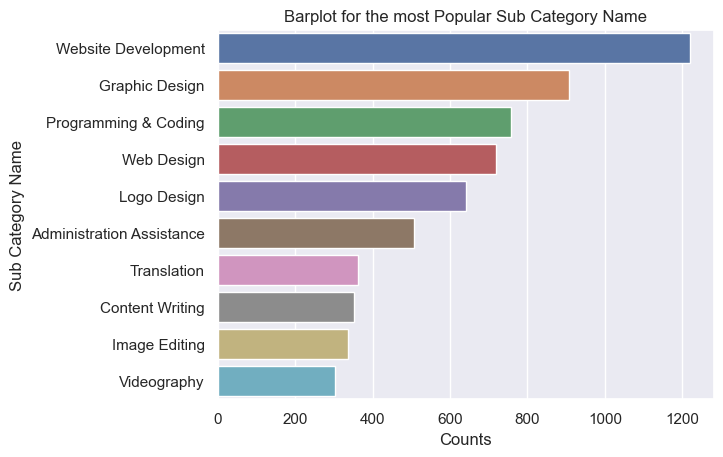

In [40]:
sns.barplot(data= top_ten_subs, x= 'Counts', y= 'Sub Category Name')

plt.title('Barplot for the most Popular Sub Category Name')

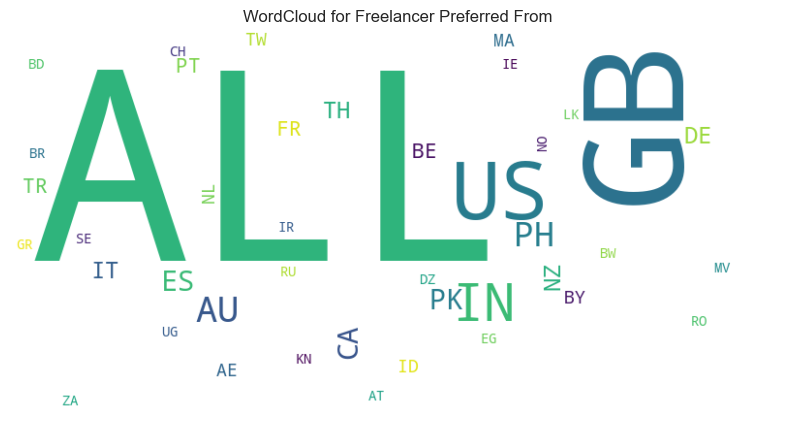

In [41]:
value_counts = df['Freelancer Preferred From'].value_counts()

counts_dict = value_counts.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(counts_dict)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation="bilinear")

plt.title('WordCloud for Freelancer Preferred From')

plt.axis("off")

plt.show()


In [42]:
top_ten_region = df['Freelancer Preferred From'].value_counts().reset_index()

top_ten_region = top_ten_region.rename(columns= {'index':'Freelancer Preferred From','Freelancer Preferred From': 'Counts'}).head(10)

top_ten_region

Freelancer Preferred From  Counts
0                       ALL   11431
1                        GB     578
2                        US      90
3                        IN      27
4                        AU      10
5                        PH       9
6                        PK       6
7                        ES       6
8                        CA       6
9                        TH       4

Text(0.5, 1.0, 'Barplot for the most Popular Regions of Preference for Freelancers')

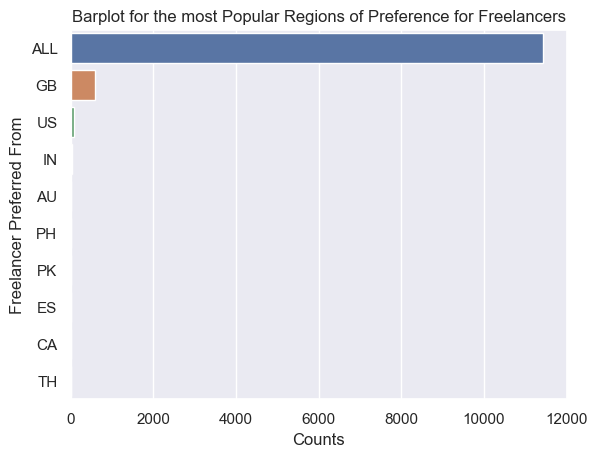

In [43]:
sns.barplot(data= top_ten_region, x= 'Counts', y= 'Freelancer Preferred From')

plt.title('Barplot for the most Popular Regions of Preference for Freelancers')

In [44]:
top_ten_duration = df['Duration'].value_counts().reset_index()

top_ten_duration = top_ten_duration.rename(columns= {'index' : 'Duration','Duration' : 'Counts'}).head(10)

top_ten_duration

Duration  Counts
0    less than 1 week   11028
1       1 day or less     332
2             Ongoing     270
3         1 - 2 weeks     229
4         3 - 4 weeks     136
5        1 - 6 months     107
6            Not sure      61
7  More than 6 months      33
8            72 hours       3
9              2 days       3

Text(0.5, 1.0, 'Barplot for the Duration')

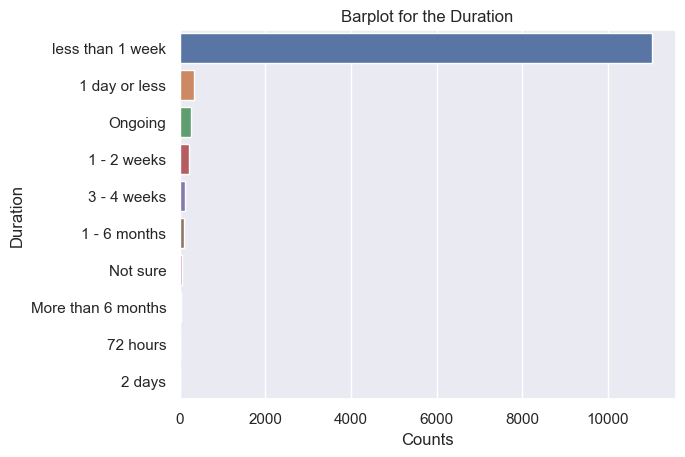

In [45]:
sns.barplot(data= top_ten_duration, x= 'Counts', y= 'Duration')

plt.title('Barplot for the Duration')

Text(0.5, 1.0, 'Client Registration Year Distribution')

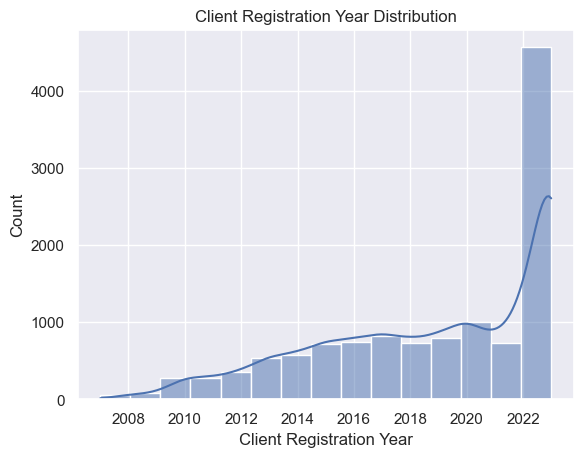

In [46]:
sns.histplot(data= df, x= 'Client Registration Year', kde= True,bins= 15)

plt.title('Client Registration Year Distribution')

# Bivariate Analysis


In [47]:
df.columns

Index(['Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Year Posted', 'Duration', 'Client Registration Year', 'Client City',
       'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

In [48]:
CLR = df.groupby('Client Registration Year')['Budget'].sum().reset_index()

In [49]:
px.line(CLR, x= 'Client Registration Year', y= 'Budget',title= 'Change in Budget over Different Registration Times')

In [50]:
#Category with the highest budget

category_budget= df.groupby('Category Name')['Budget'].sum().reset_index()

category_budget= category_budget.nlargest(10,'Budget')

#Experience with the highest budget

Experience_budget= df.groupby('Experience')['Budget'].sum().reset_index()

Experience_budget= Experience_budget.nlargest(10,'Budget')

#Category with the highest budget

location_budget= df.groupby('Location')['Budget'].sum().reset_index()

location_budget = location_budget.nlargest(10,'Budget')

#Sub Category with the highest budget

sub_category_budget= df.groupby('Sub Category Name')['Budget'].sum().reset_index()

sub_category_budget = sub_category_budget.nlargest(10,'Budget')

#Client Country with the highest budget

client_country_budget= df.groupby('Client Country')['Budget'].sum().reset_index()

client_country_budget = client_country_budget.nlargest(10,'Budget')

#Client Job Title against Budget

client_JT_budget= df.groupby('Client Job Title')['Budget'].sum().reset_index()

client_JT_budget= client_JT_budget.nlargest(10,'Budget')

#Duration against Budget

duration_budget= df.groupby('Duration')['Budget'].sum().reset_index()

duration_budget = duration_budget.nlargest(10,'Budget')

Text(0.5, 1.0, 'Categories with the highest budget')

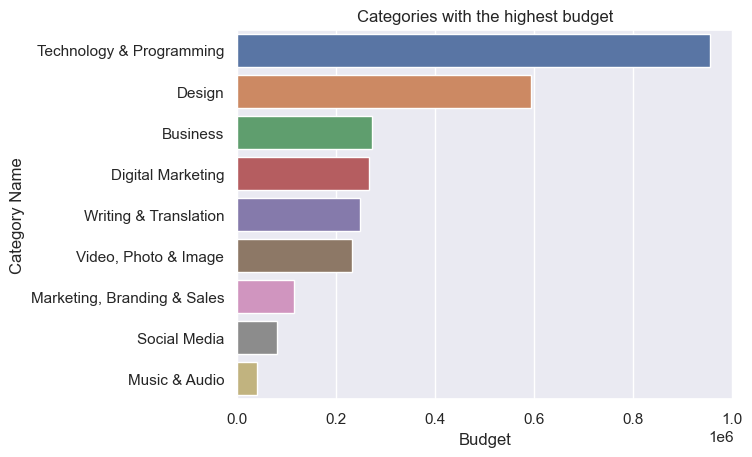

In [51]:
sns.barplot(data= category_budget, x= 'Budget', y= 'Category Name')

plt.title('Categories with the highest budget')

In [58]:
Experience_budget

Experience     Budget
1        Expert  2358942.0
0         Entry   266453.0
2  Intermediate   176150.0

In [62]:
px.pie(Experience_budget, names= 'Experience', values= 'Budget',title= 'Proportion of Budget By Experience Level')

In [52]:
sns.barplot(data= Experience_budget, x= 'Budget', y= 'Experience')

plt.title('Experience Level with the highest budget')

Text(0.5, 1.0, 'Experience Level with the highest budget')

Text(0.5, 1.0, 'Location with the highest budget')

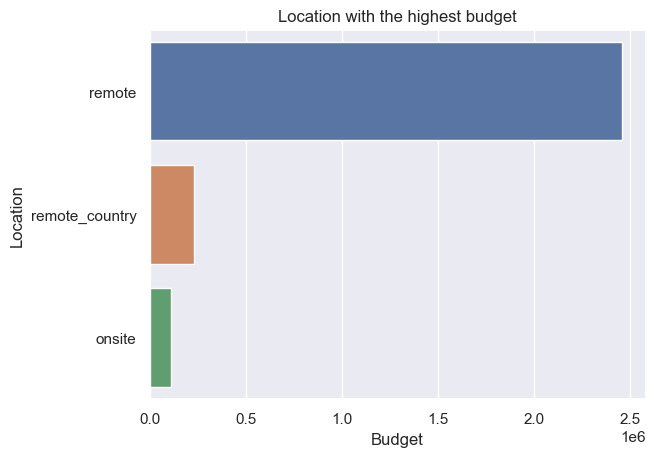

In [53]:
sns.barplot(data= location_budget, x= 'Budget', y= 'Location')

plt.title('Location with the highest budget')

Text(0.5, 1.0, 'Sub Categories with the highest budget')

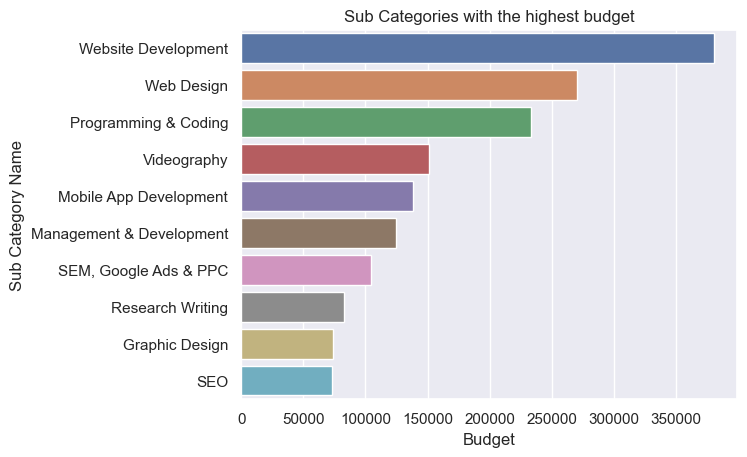

In [54]:
sns.barplot(data= sub_category_budget, x= 'Budget', y= 'Sub Category Name')

plt.title('Sub Categories with the highest budget')

Text(0.5, 1.0, 'Client Country with the highest budget')

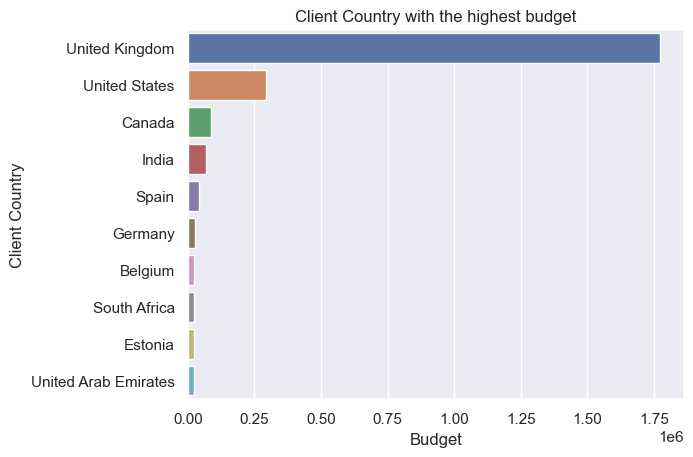

In [55]:
sns.barplot(data= client_country_budget, x= 'Budget', y= 'Client Country')

plt.title('Client Country with the highest budget')

Text(0.5, 1.0, 'Client Job Titles with the highest budget')

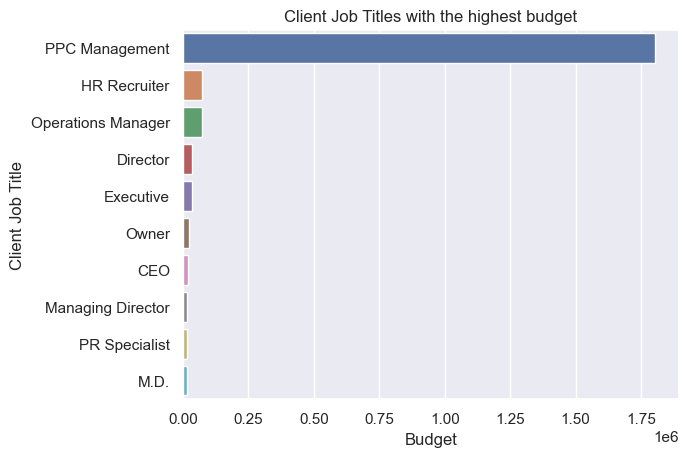

In [56]:
sns.barplot(data= client_JT_budget, x= 'Budget', y= 'Client Job Title')

plt.title('Client Job Titles with the highest budget')

Text(0.5, 1.0, 'Duration with the highest budget')

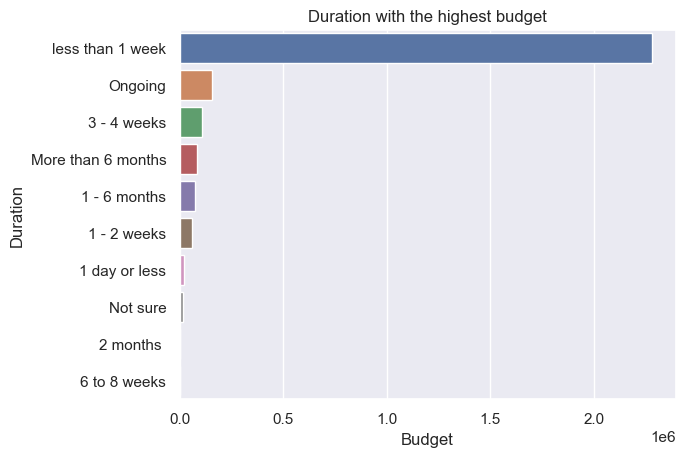

In [57]:
sns.barplot(data=  duration_budget, x= 'Budget', y= 'Duration')

plt.title('Duration with the highest budget')